# Problem - 1: Little Peak 

**Required Imports:** 

In [21]:
import bluequbit                   # Library for interfacing with Bluequbit's quantum hardware and simulators
from qiskit import QuantumCircuit  # IBM-Qiskit Library for interperting quantum circuits
from qiskit.visualization import plot_histogram
import numpy as np  
import matplotlib.pyplot as plt            

**Loading the Quantum Circuit from the QASM file ('P1_little_peak.qasm' is the file containing our required quantum circuit described in the OpenQASM format) :**

In [ ]:
qc_1 = QuantumCircuit.from_qasm_file('P1_little_peak.qasm')      # Creating Quantum Circuit from QASM file
qc_1.measure_all()                                               # Adding measurement gates to all qubits
bq_1 = bluequbit.init("<token>")                                 # Intializing BQClient with API token (We have not revealed our API keys)
shots_1 = 100                                                    # Number of shots. This parameter can be varied here. 100 shots is enough for this 4 qubit circuit.
result_1 = bq_1.run(qc_1, device='cpu', shots = shots_1)         # Running the circuit on the cpu simulator of Blue Qubit

**Classical Post-Processing:**

In [14]:
# Retrieve measurement counts from the quantum execution results.
# 'counts' is a dictionary mapping bitstrings (as strings) to the frequency
counts_1 = result_1.get_counts()

# Initializing variables to track the bitstring with the highest count.
peaked_counts_1 = 0           # Store the maximum frequency found so far.
peaked_bitstring_1 = None     # Store the corresponding bitstring.

# Iterating over each bitstring present in the measurement counts and updating variables accordingly.
for bitstring in counts_1:
   if counts_1[bitstring] > peaked_counts_1:
        peaked_counts_1 = counts_1[bitstring]
        peaked_bitstring_1=bitstring

# Outputting the results:
# - The bitstring with the highest frequency.
# - Its frequency (i.e., how many times it was measured).
# - The total number of shots (the total number of circuit executions),
#   assumed to be stored in the variable 'shots'.
# - The "peaked amplitude" computed as the square root of the ratio between the
#   highest frequency and the total shots.
print("Peaked Bitstring : ", peaked_bitstring_1)
print("Frequency :", peaked_counts_1)
print("Total Shots :", shots_1)
print("Peaked Amplitude :", np.sqrt(peaked_counts_1/shots_1))

Peaked Bitstring :  1001
Frequency : 69
Total Shots : 100
Peaked Amplitude : 0.8306623862918074


**Visualization:**

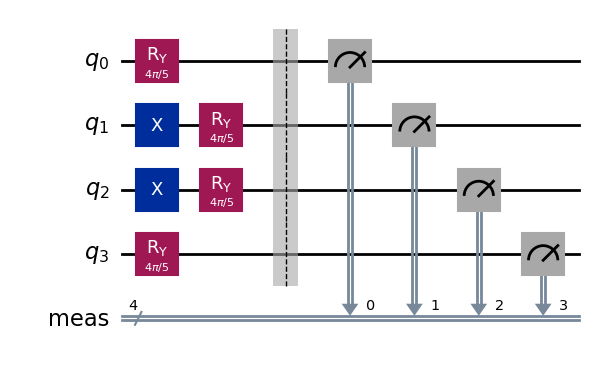

In [16]:
qc_1.draw('mpl')  # Visualizing the quantum circuit using Matplotlib

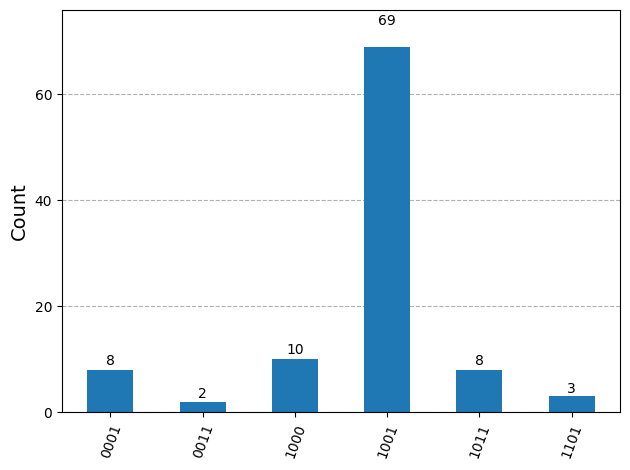

In [20]:
plot_histogram(counts_1)  # Visualizing the measurement counts using a histogram. We can see the peaked bitstring ('1001') in the histogram.

# Problem - 2: Swift Rise

**Required Imports:**

Same as Problem - 1. They have already been imported before

**Loading the Quantum Circuit from the QASM file ('P2_swift_rise.qasm' is the file containing our required quantum circuit described in the OpenQASM format) :**

In this 28 qubit circuit we have used BQ's CPU simulator since the CPU can support upto 34 qubits. Using the Matrix-Product-State Approach (mps.cpu simulator) could have been faster but it seemed overkill for a circuit with just a minute of runtime to find the peaked amplitude.

In [27]:
qc_2 = QuantumCircuit.from_qasm_file('P2_swift_rise.qasm')       # Creating Quantum Circuit from QASM file
qc_2.measure_all()                                               # Adding measurement gates to all qubits
bq_2 = bluequbit.init("<token>")        # Intializing BQClient with API token (We have not revealed our API keys) [Already Done technically in problem 1]
shots_2 = 1024                                                   # Number of shots. This parameter can be varied here. 1024 shots is enough for this 28 qubit circuit.
result_2 = bq_2.run(qc_2, device='cpu', shots = shots_2)         # Running the circuit on the cpu simulator of Blue Qubit. Can be run on mps but will be overkill for a 28 qubit circuit

[BQ-PYTHON-SDK][WARNING] - Beta version 0.12.0b1 of BlueQubit Python SDK is being used.


[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: 5CcnSobfcPVPEzwx, device: cpu, run status: PENDING, created on: 2025-04-13 13:09:03 UTC, estimated runtime: 82500 ms, estimated cost: $0.00, num qubits: 28


**Classical Post-Processing:**

In [28]:
# Retrieve measurement counts from the quantum execution results.
# 'counts' is a dictionary mapping bitstrings (as strings) to the frequency
counts_2 = result_2.get_counts()

# Initializing variables to track the bitstring with the highest count.
peaked_counts_2 = 0           # Store the maximum frequency found so far.
peaked_bitstring_2 = None     # Store the corresponding bitstring.

# Iterating over each bitstring present in the measurement counts and updating variables accordingly.
for bitstring in counts_2:
   if counts_2[bitstring] > peaked_counts_2:
        peaked_counts_2 = counts_2[bitstring]
        peaked_bitstring_2=bitstring

# Outputting the results:
# - The bitstring with the highest frequency.
# - Its frequency (i.e., how many times it was measured).
# - The total number of shots (the total number of circuit executions),
#   assumed to be stored in the variable 'shots'.
# - The "peaked amplitude" computed as the square root of the ratio between the
#   highest frequency and the total shots.
print("Peaked Bitstring : ", peaked_bitstring_2)
print("Frequency :", peaked_counts_2)
print("Total Shots :", shots_2)
print("Peaked Amplitude :", np.sqrt(peaked_counts_2/shots_2))

Peaked Bitstring :  1100101101100011011000011100
Frequency : 373
Total Shots : 1024
Peaked Amplitude : 0.603537747369624


**Visualization:**

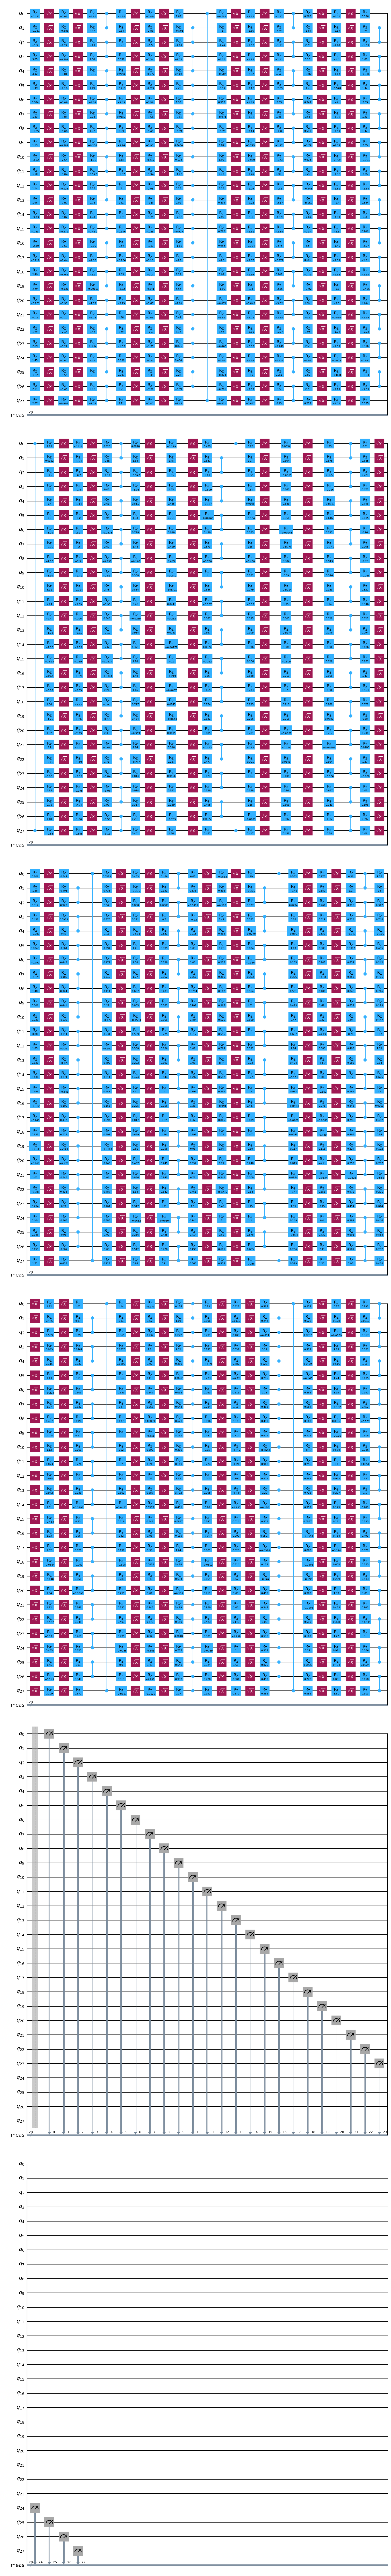

In [29]:
qc_2.draw('mpl')  # Visualizing the quantum circuit using Matplotlib

Histogram was too cluttered/infeasible to plot for this question

# Problem - 3: Sharp Peak

**Required Imports:**

In [41]:
from time import time


Rest are same as Problem - 1. They have already been imported before

**Loading the Quantum Circuit from the QASM file ('P3__sharp_peak.qasm') is the file containing our required quantum circuit described in the OpenQASM format) :**

Here we switched to using mps.cpu instead of cpu since it was a 44 qubit circuit and max qubits in cpu are 34.

In [43]:
qc_3 = QuantumCircuit.from_qasm_file('P3__sharp_peak.qasm')
qc_3.measure_all()
shots_3 = 1024                                                                      
bq_3 = bluequbit.init("tbtC35WEFeL9IXYkJoeUgFIoQzYu8lQQ")
no_bond_time_start = time()                                                        # Start time for the simulation
result_3 = bq_3.run(qc_3, device='mps.cpu', shots = shots_3)      
no_bond_time = time() - no_bond_time_start                                         # Running the circuit on the mps cpu simulator of Blue Qubit and calculating time

[BQ-PYTHON-SDK][WARNING] - Beta version 0.12.0b1 of BlueQubit Python SDK is being used.


[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: Wz2K6Wvg4aKbbNqT, device: mps.cpu, run status: PENDING, created on: 2025-04-13 15:50:10 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 44


In [36]:
# Retrieve measurement counts from the quantum execution results.
# 'counts' is a dictionary mapping bitstrings (as strings) to the frequency
counts_3 = result_3.get_counts()

# Initializing variables to track the bitstring with the highest count.
peaked_counts_3 = 0           # Store the maximum frequency found so far.
peaked_bitstring_3 = None     # Store the corresponding bitstring.

# Iterating over each bitstring present in the measurement counts and updating variables accordingly.
for bitstring in counts_3:
   if counts_3[bitstring] > peaked_counts_3:
        peaked_counts_3 = counts_3[bitstring]
        peaked_bitstring_3=bitstring

# Outputting the results:
# - The bitstring with the highest frequency.
# - Its frequency (i.e., how many times it was measured).
# - The total number of shots (the total number of circuit executions),
#   assumed to be stored in the variable 'shots'.
# - The "peaked amplitude" computed as the square root of the ratio between the
#   highest frequency and the total shots.
print("Peaked Bitstring : ", peaked_bitstring_3)
print("Frequency :", peaked_counts_3)
print("Total Shots :", shots_3)
print("Peaked Amplitude :", np.sqrt(peaked_counts_3/shots_3))

Peaked Bitstring :  10001101010101010000011111001101000100011010
Frequency : 118
Total Shots : 1024
Peaked Amplitude : 0.33946189035000673


This is the mps cpu but we are not leveraging the time speed up we can get with bond dimensions. Next we will explore that and compare the time difference

In [44]:
options={
    'mps_bond_dimension':32, 'mps_truncation_threshold':1e-16
}
bond_time_start=time()
result_3_b = bq_3.run(qc_3, device='mps.cpu', shots = shots_3, options=options) 
bond_time = time() - bond_time_start                  #


[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: 8NdVzv5Mon3TQhaG, device: mps.cpu, run status: RUNNING, created on: 2025-04-13 15:52:29 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 44


In [45]:
counts_3_b = result_3_b.get_counts()

peaked_counts_3_b = 0           
peaked_bitstring_3_b = None     

for bitstring in counts_3_b:
   if counts_3_b[bitstring] > peaked_counts_3_b:
        peaked_counts_3_b = counts_3_b[bitstring]
        peaked_bitstring_3_b = bitstring

print("Peaked Bitstring : ", peaked_bitstring_3_b)
print("Frequency :", peaked_counts_3_b)
print("Total Shots :", shots_3)
print("Peaked Amplitude :", np.sqrt(peaked_counts_3_b/shots_3))


print("Time taken without bond dimension : ", no_bond_time)
print("Time taken with bond dimension : ", bond_time)
print("Speedup : ", no_bond_time/bond_time)

Peaked Bitstring :  10001101010101010000011111001101000100011010
Frequency : 118
Total Shots : 1024
Peaked Amplitude : 0.33946189035000673
Time taken without bond dimension :  126.07059407234192
Time taken with bond dimension :  26.169150829315186
Speedup :  4.817527129352444


As we can see almost a 5x speed up can be seen when using bond dimensions